In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model_data_filepath = os.path.join('..', '..', 'MLCommons_CV_laptop_hummer', 'data', 'alex_laptop_vs_hummer_32x.csv')

model_data_df = pd.read_csv(model_data_filepath)
# print(model_data_df)

addtl_laptop_data_filepaths = []
addtl_laptop_data_dfs = []

addtl_laptop_data_filepaths.append(os.path.join('..', 'data', 'matmul_runner_test_fixed.csv'))
# addtl_laptop_data_filepaths.append(os.path.join('..', 'data', 'matmul_runner_test_2.csv'))
# addtl_laptop_data_filepaths.append(os.path.join('..', 'data', 'matmul_runner_test_3.csv'))
# addtl_laptop_data_filepaths.append(os.path.join('..', 'data', 'matmul_runner_test_4.csv'))

# addtl_laptop_data_filepaths.append(os.path.join('..', 'data', 'matmul_runner_test_hummer_large_bs.csv'))

for laptop_data_filepath in addtl_laptop_data_filepaths:
  addtl_laptop_data_df = pd.read_csv(laptop_data_filepath)
  addtl_laptop_data_df['count'] = addtl_laptop_data_df['count'].astype(float)
  addtl_laptop_data_df['hardware'] = 'alex laptop'
  addtl_laptop_data_df['arg.profile'] = laptop_data_filepath
  

  # hardcoded for one of them
  dff = addtl_laptop_data_df
  dff = dff[(dff['i'] == 8) & (dff['j'] == 32) & (dff['k'] == 2) & (dff['bs'] == 2048)]
#   print(dff)
  # print(a)

  addtl_laptop_data_dfs.append(dff)


shared_columns = ['event', 'count', 'hardware', 'arg.profile']

for addtl_laptop_data_df in addtl_laptop_data_dfs:
  model_data_df = pd.merge(model_data_df, addtl_laptop_data_df, how='outer', on=shared_columns)

df = model_data_df

df['hue'] = df['arg.profile'] + ' ' + df['hardware']

hue_order = []

model_names = ['resnet50-onnxruntime', 'ssd-mobilenet-onnxruntime', 'ssd-resnet34-onnxruntime']
# model_names = ['resnet50-onnxruntime']
model_names = model_names + addtl_laptop_data_filepaths

for model in model_names:
  for hardware in ['alex laptop', 'hummer']:
    hue_order.append(model + ' ' + hardware)

# # print(df)
# # print(hue_order)

# ax = sns.catplot(x="event", y="count", hue='hue', hue_order=hue_order, data=df, kind="bar", palette='muted', log=True, legend=False)

# plt.xticks(rotation=60)

# # plt.tight_layout()
# plt.legend(loc='upper right', borderaxespad=0)
# plt.show()

# df = df[~df['event'].isin(['dtlb_load_misses.miss_causes_a_walk', 'cpu-migrations', 'context-switches'])]

# ax = sns.catplot(x="event", y="count", hue='hue', hue_order=hue_order, data=df, kind="bar", palette='muted', log=True, legend=False)

# plt.xticks(rotation=60)

# # plt.tight_layout()
# plt.legend(loc='lower right', borderaxespad=0)
# plt.show()

/tmp/ipykernel_184333/4287178997.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_sel = df_pivot[('mean', )][ratio_dict.keys()]
/tmp/ipykernel_184333/4287178997.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['hue'] = df_sel['arg.profile'] + ' ' + df_sel['hardware']
/tmp/ipykernel_184333/4287178997.py:34: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_sel = df_pivot[('mean', )]
/tmp/ipykernel_184333/4287178997.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

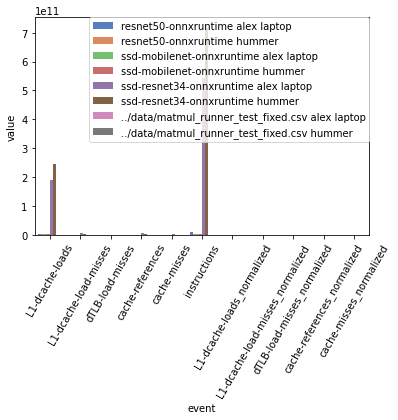

In [6]:
df_pivot = df.pivot_table(index=['arg.profile', 'hardware'], columns='event', values='count', aggfunc=[np.mean, np.std])

# print(a)

ratio_dict = {}
ratio_dict['L1-dcache-load-miss-ratio'] = {'denom': 'L1-dcache-loads', 'num': 'L1-dcache-load-misses'}
ratio_dict['LL-cache-miss-ratio'] = {'denom': 'cache-references', 'num': 'cache-misses'}
ratio_dict['dTLB-load-miss-ratio'] = {'denom': 'L1-dcache-loads', 'num': 'dTLB-load-misses'}
ratio_dict['branch-miss-ratio'] = {'denom': 'branches', 'num': 'branch-misses'}

for key in ratio_dict.keys():
  df_pivot[('mean', key)] = df_pivot[('mean', ratio_dict[key]['num'])] / df_pivot[('mean', ratio_dict[key]['denom'])]


df_sel = df_pivot[('mean', )][ratio_dict.keys()]

# print(df_sel)
df_sel.reset_index(inplace=True)

df_sel['hue'] = df_sel['arg.profile'] + ' ' + df_sel['hardware']
# print(df_sel)
df_sel_melted = df_sel.melt(id_vars=['arg.profile', 'hardware', 'hue'])
# print(df_sel_melted)

# ax = sns.catplot(x='event', y='value', data=df_sel_melted, kind='bar', hue='hue', hue_order=hue_order)
# plt.xticks(rotation=10)
# plt.show()

# for key in ratio_dict.keys():
#   ax = sns.catplot(x='arg.profile', y=key, data=df_sel, kind='bar', hue='hardware')
#   plt.xticks(rotation=10)
#   plt.show()

df_sel = df_pivot[('mean', )]
df_sel.reset_index(inplace=True)
# print(df_sel)
df_sel['hue'] = df_sel['arg.profile'] + ' ' + df_sel['hardware']

keys = ['L1-dcache-loads', 'L1-dcache-load-misses', 'dTLB-load-misses', 'cache-references', 'cache-misses']

df_sel = df_pivot[('mean', )][keys + ['instructions']]
df_sel.reset_index(inplace=True)
for key in keys:
  df_sel["{}_normalized".format(key)] = df_sel[key] / df_sel['L1-dcache-loads']
# print(df_sel)
# df_sel.drop('instructions', axis=1, inplace=True)
df_sel['hue'] = df_sel['arg.profile'] + ' ' + df_sel['hardware']

df_sel_melted = df_sel.melt(id_vars=['arg.profile', 'hardware', 'hue'])
# print(df_sel_melted)

ax = sns.barplot(x='event', y="value", hue='hue', hue_order=hue_order, data=df_sel_melted, palette='muted')

plt.xticks(rotation=60)
plt.legend(loc='upper right', borderaxespad=0)
plt.show()

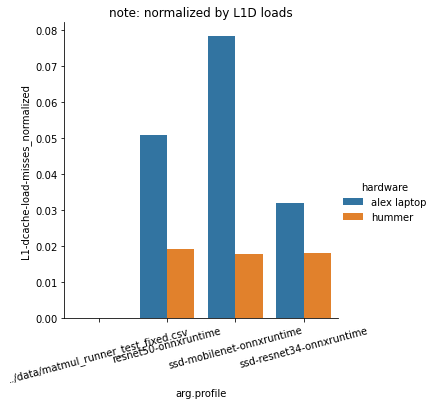

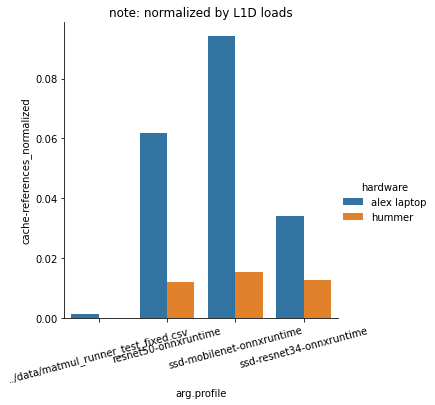

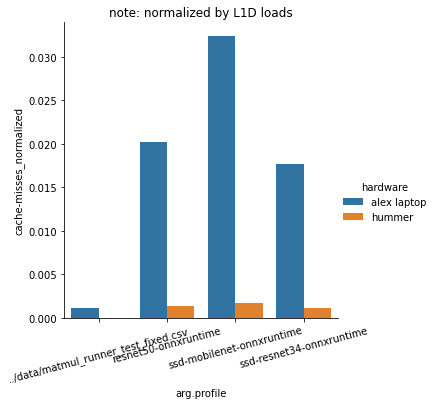

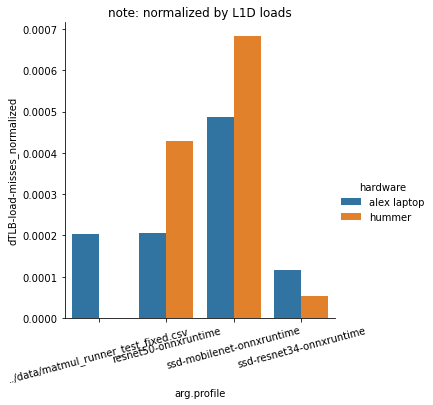

In [7]:
for key in ['L1-dcache-load-misses_normalized', 'cache-references_normalized', 'cache-misses_normalized', 'dTLB-load-misses_normalized']:

  sns.catplot(x='arg.profile', y=key, data=df_sel, kind='bar', hue='hardware')

  plt.xticks(rotation=15)
  plt.title("note: normalized by L1D loads")
  plt.subplots_adjust(top=0.94)
  plt.show()

# ax = sns.catplot(x="event", y="computed_value", hue='hue', hue_order=hue_order, data=df.loc[df['event'].isin(['L1-dcache-load-misses', 'cache-misses'])], kind="bar", palette='muted')
# plt.show()

# df_mean = df_pivot['mean']

# df['L1-dcache-loads-miss-ratio'] = df['L1-dcache-load-misses'] / df['L1-dcache-loads']